<a href="https://colab.research.google.com/github/abdulkadirdemirci/GlobalAiHub_Proje/blob/main/globalaihub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2. IMPORTING REQUIRED LIBRARIES**

In [17]:
!pip install pycaret

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import pycaret as pc
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [19]:
from pycaret.regression import *

#**3. PERFORM AN EXPLORATORY DATA ANALYSIS**

In [20]:
data= pd.read_csv("/content/insurance.csv")

In [21]:
df = data.copy()

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###3.1. examine the distributıon of bmi

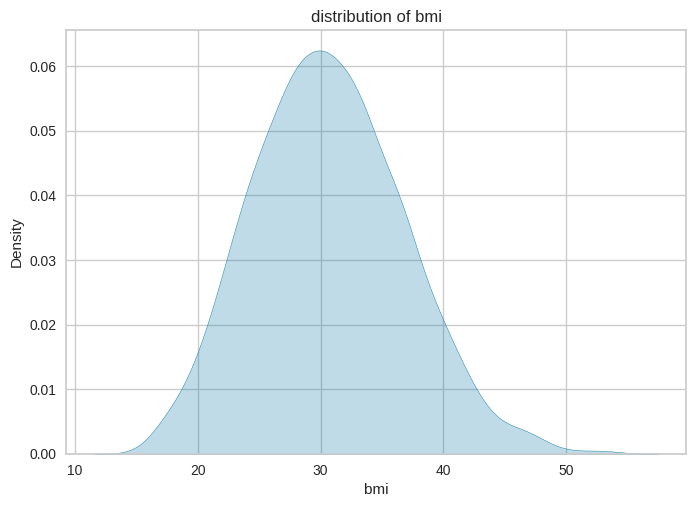

In [23]:
sns.kdeplot(data=df,x="bmi",fill=True)
plt.title("distribution of bmi")
plt.show()

veri setinde vucut kitle indeksi dagılımı 30 yani overweight de bulunmakta. eger veris seti populasyonu iyi temsil eden bir veri seti ise toplumun obez olma eşiğinde oldugu ve buna bağlı sağlık sorunlarının şuan ve gelecekte artacagı bundan dolayı diyetisyenlik, spor koçluğu, beslenme uzmanları gibi mesleklere ihtiyacın artacagı bu alanlarda istihdamın artacagı söylenebilir. ayrıca 30 değeri sonrası yüksek bmi degerine sahip kişi yogunlugu belli bir oranda düşüş göterirken bu ivme 40 - 50 arasında yavaslama göstermiş. bu da gelecekte bmi degerlerinin gittikçe yükselmesi ve obez yogunlugunun artacagına işaret ediyor. gelecekte bu grafik tekrar çizdirilirse peek degerinin sag tarafa dogru kaydıgını görmek muhtemel. ivmedeki bu azalış başka bir bakış açısı ile şu şekilde de yorumlana bilir: buradaki yüksek bmi degerine sahip kişilerin umutlarını tükettikleri ve zayıflamak veya sağlıklı bir yaşama geri dönmek için çaba sarf etmedikleri ve bu kişişlerin burada birikerek sayılarının arttıgı yönünde olabilir.

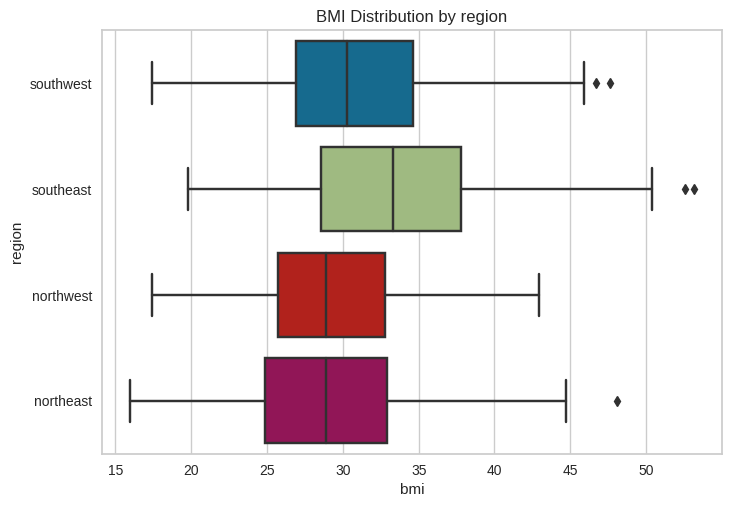

In [24]:
sns.boxplot(data=df,x="bmi",y="region")
plt.title("BMI Distribution by region")
plt.show()

en geniş bmi dağılımına sahip bölge güneydoğu bölgesi, en dar bmi dağılımına sahip bölge ise kuzeybatıdır. bu ikisi arasında kuzeybatılı insanların beslenme alışkanlıklarının güneydogulu insanlara göre daha sağlıklı oldugu ve medyan degerinin 30 dan düşük olması sebebi ile bu bölge insanının çogunlukla overweight ama obez olmayan kişiler oldugu söylenebilir. güneydogulu insanların ise genel olarak obez oldugu rahatlıkla söylenebilir. güneydogu kutu grafiğine dikkatli bakıldıgında ise alt kuyruk degerinin diğer 3 bölgeye kıyasla daha yüksek bmi degerlerinden başladıgı görülür bu da bu kesimin diger tüm bölgelerden daha sağlıksız oldugu ve daha saglıksız olmaya da meyilli oldugunu gösterir. insanları saglıklı olmaya teşvik amacı ile bir sağlık hareketi başlatılacak olursa en mantıklı bölge güneydoğu bölgeleri olur. güneybatı ve kuzeydoğu bölgeleri ise güneydoğu ve kuzeybatı arasında değerlere sahiptir ve her nekadar outlier degerlere sahip oldukları gözükse de bu degerler güneydogu skalasında malesef outlier olarak degil normal olarak gözükmektedir. bu da diğer 3 bölgeye göre güneydoğu durumun ne kadar kötü oldugunu gösterir.

###3.2. examine the relationship between "smoker" and "charges"

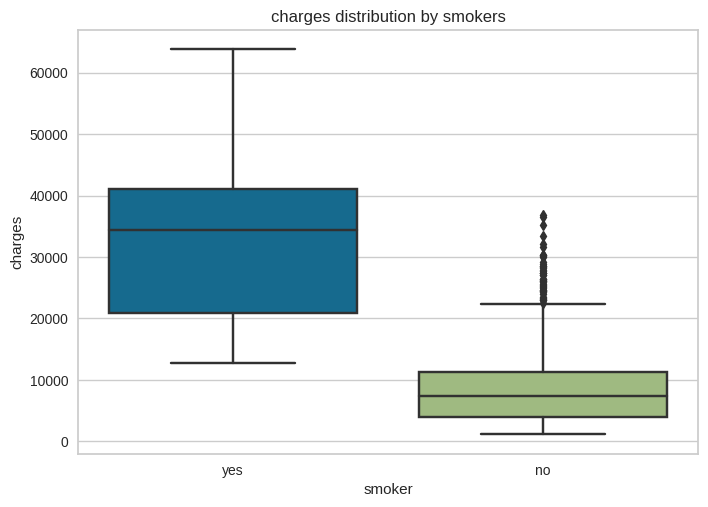

In [25]:
sns.boxplot(data=df,x="smoker",y="charges")
plt.title("charges distribution by smokers")
plt.show()

sigorta şirketlerinin sigara kullanımını ne kadar riskli bir alışkanlık olarak gördüklerini açıklayan bu grafikte sigara içmeyen bir kişinin sigorta maliyetinin içene göre yaklaşık ~27000 dolar daha ucuz oldugu söylenebilir. sigara içenlerde outlier bulunmaması şu şekilde yorumlanabilir: bir sigorta şirketi maliyet hesaplarken sigaranın yanında bir çok kriterede bakıyor ve maliyet çıkartıyor bu da genel olarak sigara içenlerin bir çok hastalıga sahip oldugunu bundan dolayı sigara içen kişilerin sigorta maliyetlerinin bu kadar yüksek degerlerde toplandıgını söyleyebiliriz. kısaca sigara içenler beraberinde bir kaç hastalığa da sahip olma ihtimali yüksek ve genel toplum da zaten bu şekilde bu yüzden outlier yok. fakat sigara içmeyenlerde outlier olması ise bu kişilerin sigorta maliyetini artıran diğer hastalıkarın sebebinin sigara degil genetik, çevresel veya ağır iş koşullarından dolayı yüksek oldugu ve bu durumun sigara içmeyen kesimde nadiren gerçekleştiği şeklinde yorumlanabilir.

###3.3. examine the relationship between "smoker" and "region"

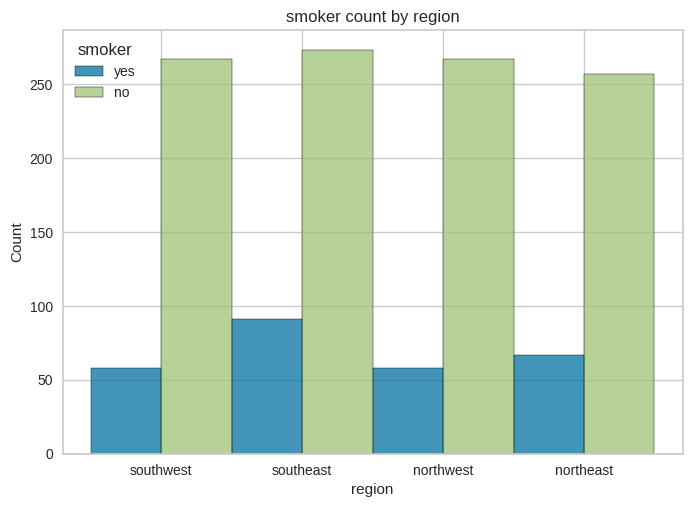

In [26]:
sns.histplot(binwidth=1,
            x="region",
            hue="smoker",
            data=df,
            stat="count",
            multiple="dodge")
plt.title("smoker count by region")
plt.show()

obeziteyi incelediğimiz önceki grafiklerde güneydoğu kesiminin sağlık açısından büyük tehlikede oldugunu yorumlamiştık şimdi ise sigara tüketiminin de yüksek olması bu durumu destekler nitelikte. hatta sigara tüketiminin stressli ve geçim sıkıntısı sebebi(psikolojık zorluklar) tüketildiğini göz önünde bulundurursak güneydoğu bölgesinde geçim sıkıntısı, işsizlik vb. sorunların da bulundugu tezinin doğmasına yardımcı olur. fakat dikkat edilirse güneydoğu bölgesinde sigara içmeyenlerin sayısı da yüksek yani nufusun yoğun oldugu bölge güneydogudur. nerde kalabalık varsa orada yüksek işsizlik ve geçim sıkıntıları bulunur.

###3.4. examine the relationship between bmi and sex

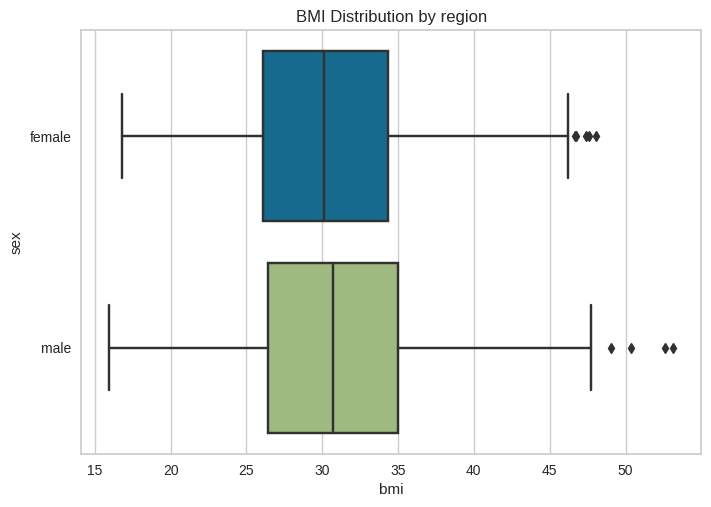

In [27]:
sns.boxplot(data=df,x="bmi",y="sex")
plt.title("BMI Distribution by region")
plt.show()

kadın ve erkek kesımlerin ikiside çogunluklu olarak 30 bmi degeri üstündedir ve obez olarak nitelendirirlirler. iki kutu grafiğinin de birbirlerine outlierlar hariç bu kadar benzemesi obezitenin cinsiyet ile çok da bağlantılı olmadıgı anlamına gelir. fakat outlierlara bakarsak erkek kesimin bu konu da daha umursamaz olabilecegi aşırı yüksek bmi degerlerinden anlaşılmaktadır.

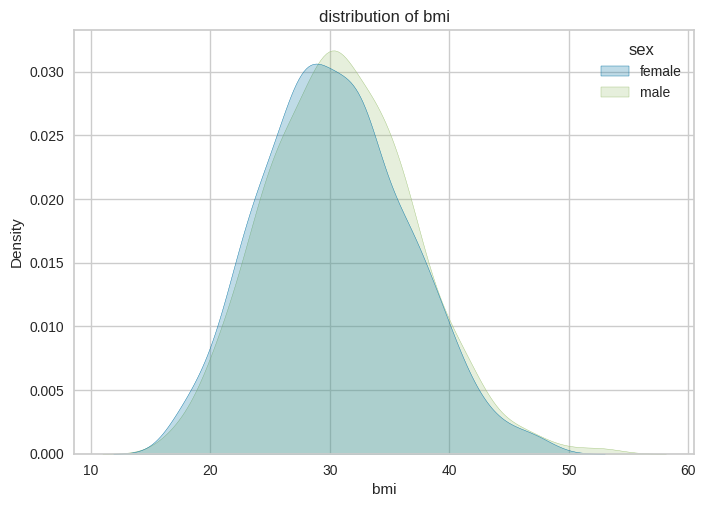

In [28]:
sns.kdeplot(data=df,x="bmi",hue="sex",fill=True)
plt.title("distribution of bmi")
plt.show()

kutu grafiğinde görülen yüksek bmi degerleri yoğunluk dagılım grafiğinde degörünmektedir. lakin ilk ilk yoğunluk grafiginde üzerinde durmuş oldugumuz 40 - 50 bmi deger aralıgındaki ivmenin azalmasının sebebi kadınlar olarak gözükmektedir. sonuç olarak kadınlarda 40 50 arası bmi bölgesinde birikmeler başlamış ve önlem alınması gerekiyor demek.

###.3.5. find the "region" with the most "children"

In [29]:
g_df = df.groupby("region")[["children"]].count().reset_index()
g_df.head()


,region,children
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [30]:
max_children_region = g_df[g_df['children'] == g_df['children'].max()]['region'].values[0]

print("Region with the highest number of children:", max_children_region)

Region with the highest number of children: southeast


güneydoğu bölgesindeki çocuk sayısının diğer bölgelerden fazla olması grafiklerde yaptıgımız incelemeler ve yorumların geçerliliğinin çocuklar üzerindeki payının diğer 3 bölegeye nazaran güneydoğuda daha fazla oldugunu gösterir. gençlerin daha yüksek oranda bulunması bu bölgelerde sağlıksız beslenmenin gençler arasında yaygın oldugu anlamına gelir.

###3.6. examine the relationship between age and bmi

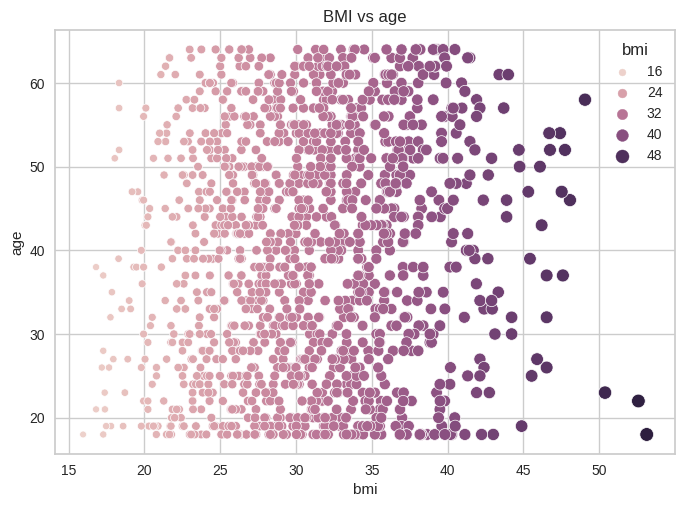

In [31]:
sns.scatterplot(data=df, x="bmi",y="age",size="bmi",hue="bmi")
plt.title("BMI vs age")
plt.show()

bmi degerinin yaş ile pozitif lineer bir ilişkisi olmadıgını gösteren ilk grafiğimizde bu sonucu düşük yaş bölgelerinde yüksek bmi degerleri ile karşılaşmamıza ragmen yüksek yaş bölgelerinde bu denli yüksek bmi degerleri ile karşılaşmıyor oluşumuzdur. fakat bunun diğer bir bakış açısından sebebi yüksek yaş guruplarında yüksek bmi değerlerinin daha ölümcül olması gençlerin ise bu duruma daha dirençli oldugu şeklinde açıklanabilir.

###3.7. examine the relationship between bmi and children

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 64.4+ KB


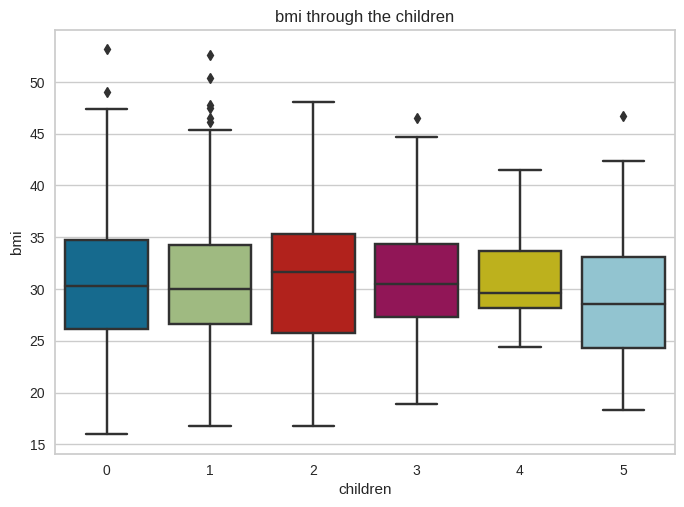

In [32]:
df["children"] = df["children"].astype("category")
df.info()
sns.boxplot(data=df,x="children",y="bmi")
plt.title("bmi through the children")
plt.show()

çocuk sayısı arttıkça bmi taban seviyesınin 20 den aşagıda bulunması toplumun bir kesiminin sağlıklı ve fit olma çabasının bulundugunu gösterir. çocuk sayısı göz ününe alınmaksızın genel tablo incelendiginde genel tablo her nekadar kritik obezite ve aşırı kilo sınır degeri 30 civarında olsa da saglıgına dikkat eden kişiler de bulunuyor. çocuk sayısının yaş ile orantılı oldugu düşünülürse genç annelerde yüksek outlier derecesinde yüksek bmi degerleri doğum sonrası hareketsiz yaşam tarzını benimsediklerini gösteriyor olabilir. bu kişilere çocuları ile beraber yaşamlarını hareketlendirebilecekleri ortamların oluştrulması önemli. artan çocuk sayısı ile her ne kadar alt ve üst tail degerleri daralmış gözükse de bu bölgedeki kişiler hala yüksek bmi degerleri arasındadır ve buyuk çogukluk yüksek bmi degerlerine sahiptir. üst tailin kısalması iyiye işaret iken alt tailin kısalması olumlu bir durum degildir.

###3.8. is there any outlier in bmi?

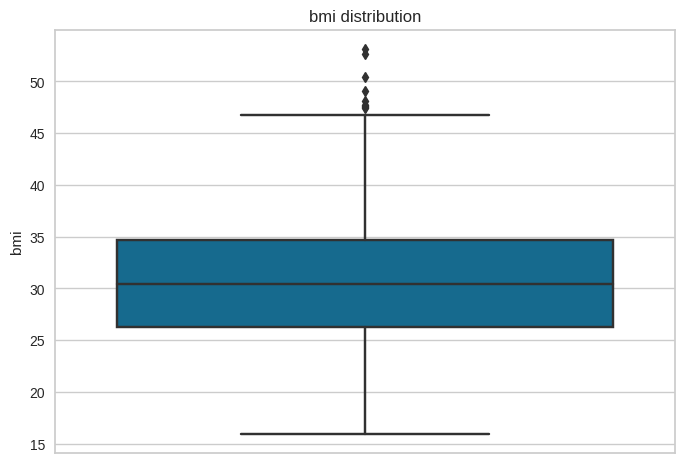

In [33]:
sns.boxplot(data=df,y="bmi")
plt.title("bmi distribution")
plt.show()

In [34]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [35]:
df[df["bmi"] > upper]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


q3 e iqr değerinin 1.5 katı eklenerek bulunan üst kuyruk sınırının üzerinde kalan bmi değerleri ve bu değerlere sahip veri noktalarının diğer değişken değerleri gösterilmiştir. aykırı değerler sadece üst sınırın üzerinde kalanlar değildir alt sınırın altında kalan değerlerde aykırıdır fakat grafikten de görülecegi gibi alt sınırda aykırılık yoktur.

###3.9. examine the relationship between bmi and charges

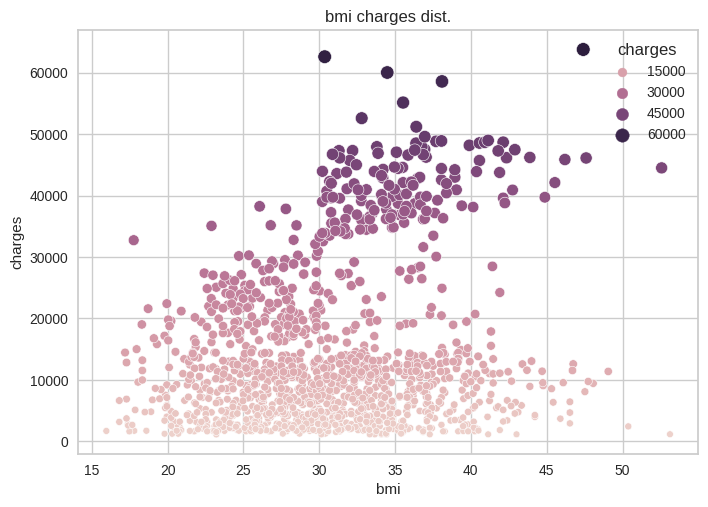

In [36]:
sns.scatterplot(data=df,x="bmi", y="charges",hue="charges",size="charges")
plt.title("bmi charges dist.")
plt.show()

beklenti yüksek bmi degerlerinde daha yüksek charges degerleri görmek yönünde olsa da graik incelendiginde 10000 dolar civarında büyük bir yığılmanın bulundugu ve bu bölgede hem düşük bmi hem de aşırı yüksek bmi degerleri bulundugu görülüyor. bu durum sigorta şirketlerinin tek kriterinin bmi olmadıgını ayrıca genç kesimin yüksek bmi değerine sahip olmasına ragmen ilerleyen zamanlarda tekrar saglıklı kilolara geri dönebileceklerine inandıkları anlamına gelebilir.

###3.10. examine the relationship between "region","smoker" and "bmi" usıng bar plot

In [37]:
df1 = df.groupby(['region','smoker'])['bmi'].aggregate(["mean"]).reset_index()
df1

,region,smoker,mean
0,northeast,no,29.332082
1,northeast,yes,28.565224
2,northwest,no,29.212678
3,northwest,yes,29.140431
4,southeast,no,33.442418
5,southeast,yes,33.096703
6,southwest,no,30.507865
7,southwest,yes,31.005172


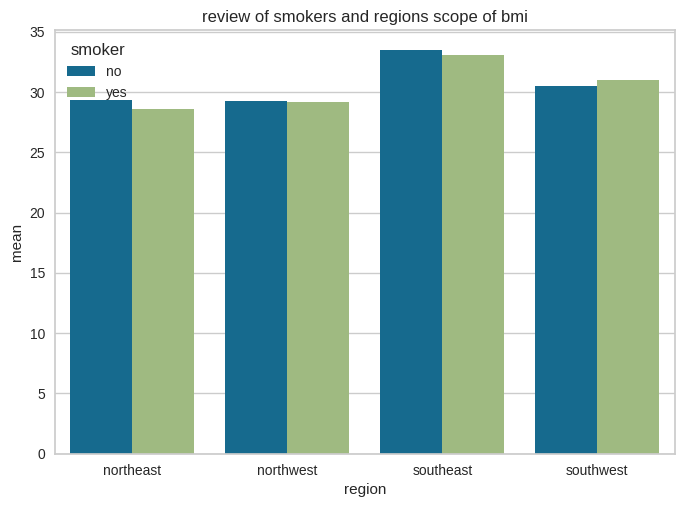

In [38]:
sns.barplot(data=df1,x="region",hue="smoker",y="mean")
plt.title("review of smokers and regions scope of bmi")
plt.show()

güneydoğu ve güneybatı bölgeleri bmi ortalaması olarak 30 (obez) sınırını hem sigara içenler hem de içmeyenler olarak aşmış durumda. kuzey bölgeleri ise tehlikeli bölgede (overweight) bulunuyorlar

#**4. DATA PREPROCESSING**

###**4.1. FEATURE ENGINEERING**

In [39]:
df["bmi_class"] = ["obese" if x >30 else "overweight" if x>25 else "normal" if x>18.5 else "underweight" for x in df["bmi"]]

* bmi > 30  ==> obez
* bmi > 25  ==> overweight
* bmi > 18.5 ==> normal
* bmi < 18.5 ==> underweight

bmi özelliği kullanılarak yeni değişken oluşturuldu.

###**4.2. ENCODING & SCALING DATA**

In [40]:
df=pd.get_dummies(data=df,columns=["sex","smoker","region","bmi_class"],drop_first=True)


cinsiyet, içicilik, bölge ve bmi_class(yeni oluşturulan değişken) değişkenleri encode edilerek modele hazırlandı. Encoding işlemlerinde n farklı değer için n farklı değişken oluşur fakat aynı şeyi temsil ederler bu yüzden n farklı değer için n-1 değişken yeterlidir bizim için. dropfirst ile bir anlamsız değişken silinir.

In [41]:
scaler = MinMaxScaler()

In [42]:
scaled= scaler.fit_transform(df)

model daha iyi çalışsın diye farklı skalalarda dagılan sayısal değişkenler 0-1 arasında sıgdırılır.

In [43]:
columns_name = df.columns

In [44]:
scaled_df = pd.DataFrame(scaled, columns=columns_name)

ndarray (numpy array) haline gelen scale edilmis veri setini tekrar pandas dataframeine çeviriyoruz.

In [45]:
scaled_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


###**4.3. SPLITTING DATA TO TRAIN & TEST DATASETS**

In [46]:
y=scaled_df[["charges"]]

In [47]:
X = scaled_df.drop("charges",axis=1)

hedef değişken tüm veri setinden ayrıldı.

In [48]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,0.321227,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
y.head()

,charges
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

veri seti, modelin egitilmesi ve model performansının ölçülmesi için train ve test olarak ayrılır.

In [51]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
1318,0.369565,0.638956,0.8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1142,0.739130,0.239440,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
356,0.608696,0.751412,0.6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
337,0.956522,0.311811,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
845,0.913043,0.443637,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
683,0.760870,0.224913,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
628,0.869565,0.592951,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
788,0.239130,0.176352,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,0.434783,0.138822,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
517,0.586957,0.391041,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1018,0.782609,0.534167,0.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
775,0.717391,0.467312,0.6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
617,0.673913,0.259349,0.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
891,0.391304,0.351897,0.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1082,0.434783,0.107345,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
105,0.043478,0.324590,0.2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
235,0.478261,0.168415,0.4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1293,0.608696,0.263250,0.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [53]:
y_train

,charges
1318,0.293300
1142,0.414952
356,0.124859
337,0.204566
845,0.700528
...,...
683,0.139534
628,0.163517
788,0.065248
408,0.088281


In [54]:
y_test

,charges
517,0.116389
1018,0.181543
775,0.150660
617,0.354113
891,0.097719
...,...
1082,0.075565
105,0.262392
235,0.292463
1293,0.130570


##**5. MODEL SELECTION**

###**5.1. TRYING SEVERAL MODELS BY USING PYCARET LIBRARY**

In [55]:
s = setup(df,target="charges",session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 12)"
4,Transformed data shape,"(1338, 17)"
5,Transformed train set shape,"(936, 17)"
6,Transformed test set shape,"(402, 17)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [56]:
bestmodels = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2725.7660,23422238.2924,4822.1158,0.8335,0.4516,0.3251,0.5980
rf,Random Forest Regressor,2796.6245,25292530.8686,5013.5910,0.8183,0.4769,0.3442,1.0450
lightgbm,Light Gradient Boosting Machine,3006.8635,25544736.6878,5043.1084,0.8138,0.5501,0.3816,0.3830
ada,AdaBoost Regressor,4210.6636,28275798.2086,5310.0995,0.7958,0.6392,0.7416,0.1370
et,Extra Trees Regressor,2837.7896,28935872.5345,5353.0921,0.7925,0.5029,0.3609,0.5580
xgboost,Extreme Gradient Boosting,3302.5412,31379655.2000,5576.2035,0.7707,0.6089,0.4354,0.3370
br,Bayesian Ridge,4324.3184,37700166.5045,6119.0111,0.7356,0.6092,0.4607,0.2510
ridge,Ridge Regression,4324.4199,37697852.0461,6118.8284,0.7356,0.6082,0.4607,0.1040
llar,Lasso Least Angle Regression,4317.9774,37700322.3267,6118.9179,0.7355,0.5999,0.4602,0.2030
lasso,Lasso Regression,4317.9620,37700319.1007,6118.9191,0.7355,0.5999,0.4602,0.1010


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

PYCARET kutuphanesi "setup" fonkiyonu yardımıyla da belirlenebilen arkaplanda tanımlı kabuller dahilinde (veriyi test- train olarak ayırmak vs.) ön tahmin işlemlerinden geçirerek en iyi modeli seçmek adına zaman kazandırır.

pycaret sonrası en iyi iki algoritma GRADIENT BOOSTING REGRESSOR ve RANDOM FORESTS REGRESSOR olmustur. bu iki model üzerinden devam edilecek.

###**5.2. MODELING BEST TWO REGRESSION MODELS**

In [57]:
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()

Gradien Boosting Regressor ve Random Forests modelleri oluşturuldu.

In [58]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [59]:
rf.fit(X_train,y_train)

RandomForestRegressor()

modeller train verileri ile eğitildi

In [60]:
gbr_y_pred = gbr.predict(X_test)

In [61]:
rf_y_pred = rf.predict(X_test)

her bir model eğitim sonra başarılarını ölçmek amacıyla test veri setini kullanılarak çalıştırıldı ve tahmin verileri oluşturuldu.

###**5.3. SUCCESS SCORES BEFORE CROSS VALIDATION**

In [62]:
print("Gradient Boosting Regressor MSE: ",mean_squared_error(y_test,gbr_y_pred))
print("Gradient Boosting Regressor MAE: ",mean_absolute_error(y_test,gbr_y_pred))
print("Gradient Boosting Regressor R2: ",r2_score(y_test,gbr_y_pred))

print("\nRandom Forests Regressor MSE: ",mean_squared_error(y_test,rf_y_pred))
print("Random Forests Regressor MAE: ",mean_absolute_error(y_test,rf_y_pred))
print("Random Forests Regressor R2: ",r2_score(y_test,rf_y_pred))


Gradient Boosting Regressor MSE:  0.005394869059188521
Gradient Boosting Regressor MAE:  0.040315268750227666
Gradient Boosting Regressor R2:  0.8369506827278447

Random Forests Regressor MSE:  0.0063092420129510045
Random Forests Regressor MAE:  0.04530609873971773
Random Forests Regressor R2:  0.8093155567947748


cross validasayon öncesi modellerin tahmin başarıları yukarda verildiği gibidir. cross validasyon öncesi Gradient Boosting Regressor modelinin Random Forests Regressor modelinden daha iyi performans gösterdiği görüldü. fakat bu durum gerçekleri tamamen yansıtmamaktadır zira train_test_split ile rastgele ayrılan veri seti yanlı bir şekilde ayrılmış olabilir. bu ihtimali ortadan kaldırmak için veriseti cross validasyon işlemi sonucu 5 farklı şekilde yeniden oluşturulur ve başarı metrikler tek tek hesaplanarak bunşarın ortalaması modelin genel performansı olarak değerlendirilir.

###**5.4. SUCCESS SCORES AFTER CROSS VALIDATION**

In [63]:
k_fold = KFold(n_splits=5)

In [64]:
gbr_Scores = cross_val_score(gbr,X_test,y_test,cv=k_fold)

In [65]:
rf_Scores = cross_val_score(rf,X_test,y_test,cv=k_fold)

In [66]:
print("Gradient Boosting Regressor Scores: ",gbr_Scores)
print("\nRandom Forests Scores: ",rf_Scores)

Gradient Boosting Regressor Scores:  [0.72413581 0.76617989 0.84349019 0.88516296 0.77775867]

Random Forests Scores:  [0.69257976 0.77289274 0.86007484 0.86089657 0.79200056]


In [69]:
print("Gradient Boosting Regressor Scores Mean : ",gbr_Scores.mean())
print("\nRandom Forests Scores Mean : ",rf_Scores.mean())

Gradient Boosting Regressor Scores Mean :  0.7993455026550061

Random Forests Scores Mean :  0.795688895713603


5 katlı cross validasyon sonrası modellerin başarı metrikleri. Gradient Boosting Regressorün Random Forestsden daha başarılı oldugu görülmekte.

##**6. HYPER-PARAMETER OPTIMIZATION**

In [70]:
gbr_model_parameters= {"max_features":[3,7,11],
                       "min_samples_split" : [50,80,120],
                       "max_depth" : [3,5,8],
                       "learning_rate" : [0.1,0.001,1],
                       "n_estimators" : [50,100,150]}

rf_model_parameters= {"max_features":[3,7,11],
                       "min_samples_split" : [50,80,120],
                       "max_depth" : [3,5,8],
                       "n_estimators" : [50,100,150]}




In [71]:
gbr_GSCv = GridSearchCV(gbr, gbr_model_parameters, cv=5, n_jobs=-1, verbose=True)
rf_GSCv = GridSearchCV(rf, rf_model_parameters, cv=5, n_jobs=-1, verbose=True)

In [72]:
best_gbr = gbr_GSCv.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [73]:
best_rf = rf_GSCv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


modelin performansını artırmak için modele ait hyper parametrelerin hangi degerlerinde model daha iyi performans gösteriyor bunu görmek için GridSearchCV işlemi ile farklı hyper parametre kombinasyonları denendi ve her bir kombinasyona karşilık başarı parametresi hesaplandı ve en iyi sonucu bizlere veren hyper parametre kombinasyonları belirlendi.

In [74]:
best_gbr.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 11,
 'min_samples_split': 50,
 'n_estimators': 50}

In [75]:
best_rf.best_params_

{'max_depth': 5,
 'max_features': 11,
 'min_samples_split': 50,
 'n_estimators': 100}

##**7. MODEL EVALUATION**

In [76]:
gbr_best_model = GradientBoostingRegressor(learning_rate=0.1,
                                           max_depth=3,
                                           max_features=7,
                                           min_samples_split=50,
                                           n_estimators=50)

In [77]:
rf_best_model = RandomForestRegressor(max_depth=5,
                                      max_features=11,
                                      min_samples_split=50,
                                      n_estimators=150)

en iyi sonuç veren parametre kombinasyonları ile modeller baştan hazırlandı.

In [78]:
gbr_best_model.fit(X_train,y_train)

GradientBoostingRegressor(max_features=7, min_samples_split=50, n_estimators=50)

In [79]:
rf_best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features=11, min_samples_split=50,
                      n_estimators=150)

modeller tekrar eğitildi.

In [80]:
k_folds = KFold(n_splits=5)

In [81]:
for i in ["neg_mean_absolute_error","neg_root_mean_squared_error","r2"]:
  gbr_best_model_Scores = cross_val_score(gbr_best_model,X_test,y_test,cv=k_fold,scoring=i).mean()
  rf_best_model_Scores = cross_val_score(rf_best_model,X_test,y_test,cv=k_fold,scoring=i).mean()
  print("gbr_best_model",i,": ",abs(gbr_best_model_Scores))
  print("rf_best_model",i,": ",abs(rf_best_model_Scores))

gbr_best_model neg_mean_absolute_error :  0.046042028673189066
rf_best_model neg_mean_absolute_error :  0.06841373533528411
gbr_best_model neg_root_mean_squared_error :  0.07640423175458413
rf_best_model neg_root_mean_squared_error :  0.10562361832912552
gbr_best_model r2 :  0.8205421597190334
rf_best_model r2 :  0.6560011516686928


modeller 3 farklı başaraı metriği açısından 5 katlı cross validasyon yapılarak hesaplandı.



# **SONUÇ:**

Gradient Boosting Regressor her 3 metrikte de daha iyi performans gösterdi.